# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | cafarnaum
Processing Record 4 of Set 1 | hayma'
City not found. Skipping...
Processing Record 5 of Set 1 | queenstown
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | khorixas
Processing Record 11 of Set 1 | covington
Processing Record 12 of Set 1 | nakhon thai
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | fort st. john
Processing Record 17 of Set 1 | obo
Processing Record 18 of Set 1 | san borja
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | japekrom
City not foun

Processing Record 37 of Set 4 | revda
Processing Record 38 of Set 4 | lamu
Processing Record 39 of Set 4 | chimore
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | kuala tungkal
Processing Record 42 of Set 4 | harstad
Processing Record 43 of Set 4 | brisas de zicatela
Processing Record 44 of Set 4 | chibougamau
Processing Record 45 of Set 4 | nsanje
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | okha
Processing Record 48 of Set 4 | viedma
Processing Record 49 of Set 4 | palmer
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | khovd
Processing Record 2 of Set 5 | kapuskasing
Processing Record 3 of Set 5 | hadibu
Processing Record 4 of Set 5 | luganville
Processing Record 5 of Set 5 | scarborough
Processing Record 6 of Set 5 | sinabang
Processing Record 7 of Set 5 | lethem
Processing Record 8 of Set 5 | idri
Processing Record 9 of Set 5 | urumqi
Processing Record 10 of Set 5 | kununurra
Processing Record 11 of Set 5 |

Processing Record 29 of Set 8 | nilsia
Processing Record 30 of Set 8 | quiroga
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | camaqua
Processing Record 33 of Set 8 | la mira tumbiscatio
Processing Record 34 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 35 of Set 8 | buka
Processing Record 36 of Set 8 | saurimo
Processing Record 37 of Set 8 | merrill
Processing Record 38 of Set 8 | oranjemund
Processing Record 39 of Set 8 | ponnani
Processing Record 40 of Set 8 | thabazimbi
Processing Record 41 of Set 8 | sinjar
Processing Record 42 of Set 8 | bryne
Processing Record 43 of Set 8 | bamyan
Processing Record 44 of Set 8 | zaysan
Processing Record 45 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 46 of Set 8 | dolinsk
Processing Record 47 of Set 8 | port lincoln
Processing Record 48 of Set 8 | allapalli
Processing Record 49 of Set 8 | orchard homes
Processing Record 0 of Set 9 | qarauyl
Processing Record 1 of Set

Processing Record 19 of Set 12 | kodinsk
Processing Record 20 of Set 12 | lospalos
Processing Record 21 of Set 12 | port glaud
City not found. Skipping...
Processing Record 22 of Set 12 | sittwe
Processing Record 23 of Set 12 | mogocha
Processing Record 24 of Set 12 | ghumarwin
Processing Record 25 of Set 12 | aras-asan
Processing Record 26 of Set 12 | polyarnyy
Processing Record 27 of Set 12 | bhimunipatnam
Processing Record 28 of Set 12 | saint-philippe
Processing Record 29 of Set 12 | ciudad constitucion
Processing Record 30 of Set 12 | gornopravdinsk
Processing Record 31 of Set 12 | mohr
Processing Record 32 of Set 12 | el colomo
Processing Record 33 of Set 12 | atherton
Processing Record 34 of Set 12 | sorong
Processing Record 35 of Set 12 | elbistan
Processing Record 36 of Set 12 | barclayville
Processing Record 37 of Set 12 | kristiansund
Processing Record 38 of Set 12 | kings mountain
Processing Record 39 of Set 12 | baker city
Processing Record 40 of Set 12 | natal
Processing 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [27]:
98# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,21.17,69,26,3.58,ZA,1702220932
1,hawaiian paradise park,19.5933,-154.9731,22.80,98,100,2.06,US,1702220918
2,cafarnaum,-11.6936,-41.4683,33.11,28,0,4.12,BR,1702221259
3,queenstown,-31.8976,26.8753,11.80,86,100,3.91,ZA,1702221259
4,port-aux-francais,-49.3500,70.2167,3.20,74,33,11.88,TF,1702220896


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,21.17,69,26,3.58,ZA,1702220932
1,hawaiian paradise park,19.5933,-154.9731,22.80,98,100,2.06,US,1702220918
2,cafarnaum,-11.6936,-41.4683,33.11,28,0,4.12,BR,1702221259
3,queenstown,-31.8976,26.8753,11.80,86,100,3.91,ZA,1702221259
4,port-aux-francais,-49.3500,70.2167,3.20,74,33,11.88,TF,1702220896


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

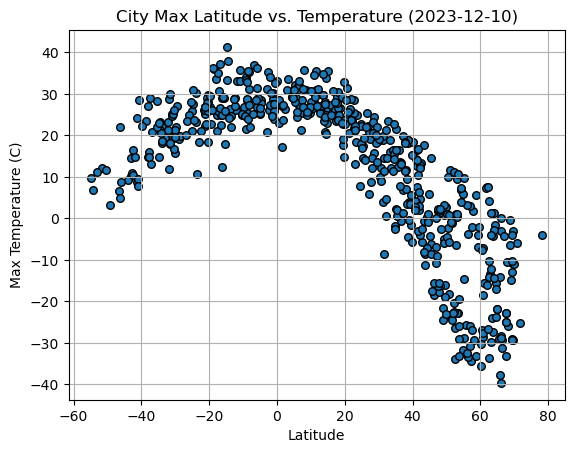

In [30]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x = "Lat",
                  y = "Max Temp",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

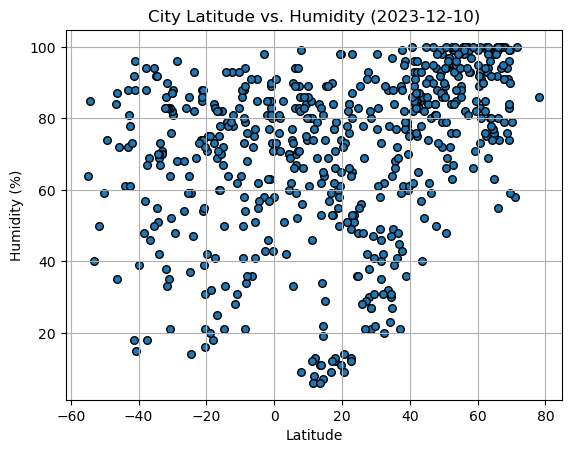

In [31]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = "Lat",
                  y = "Humidity",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

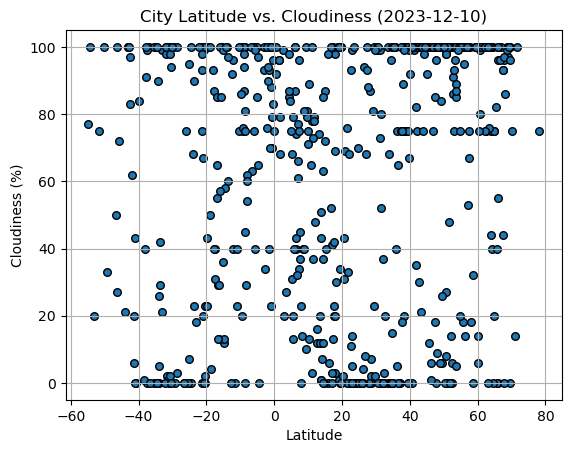

In [32]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x = "Lat",
                  y = "Cloudiness",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

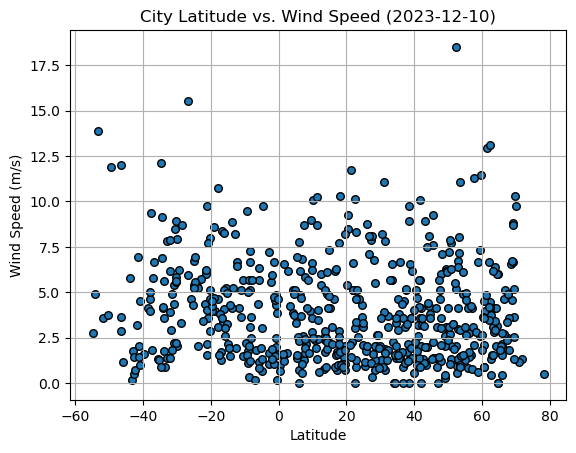

In [33]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x = "Lat",
                  y = "Wind Speed",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def lin_plot(x_values, y_values, y_label, x_ann, y_ann):
    plt.scatter(x = x_values,
                y = y_values,
                s = 30
               )
    slope, intercept, r, p, ser = linregress(x_values, y_values)
    y_corr = slope * x_values + intercept
    plt.plot(x_values,
             y_corr,
             "r-"
            )
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}',
                 (x_ann, y_ann),
                 color = "red",
                 size = 15
                )
    print(f'The r-value is: {r**2}')
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,22.80,98,100,2.06,US,1702220918
6,colonia,50.9333,6.9500,11.65,69,0,7.72,DE,1702220754
9,covington,39.0837,-84.5086,4.02,78,100,3.60,US,1702220865
10,nakhon thai,17.1006,100.8374,24.20,90,41,0.70,TH,1702221262
11,ribeira grande,38.5167,-28.7000,18.76,77,75,9.77,PT,1702220899


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,21.17,69,26,3.58,ZA,1702220932
2,cafarnaum,-11.6936,-41.4683,33.11,28,0,4.12,BR,1702221259
3,queenstown,-31.8976,26.8753,11.80,86,100,3.91,ZA,1702221259
4,port-aux-francais,-49.3500,70.2167,3.20,74,33,11.88,TF,1702220896
5,blackmans bay,-43.0167,147.3167,10.29,88,100,1.78,AU,1702220915


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7415481164008244


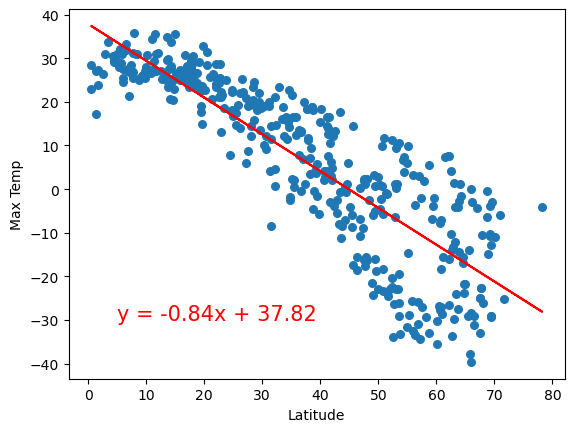

In [37]:
# Linear regression on Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Max Temp"],
         "Max Temp",
         5,
         -30
        )

The r-value is: 0.4922294016217635


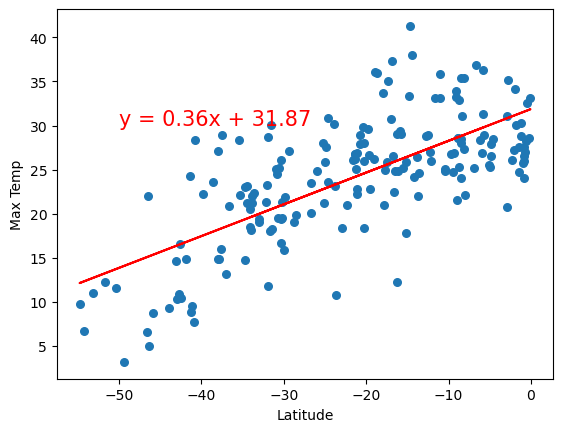

In [38]:
# Linear regression on Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Max Temp"],
         "Max Temp",
         -50,
         30
        )

**Discussion about the linear relationship:**

With the equator having Latitude 0, the further away from it you go, the temperature (and therefore Max Temp) will be cooler than at the equator. Since the Northern Hemisphere has latitudes that are positive, then the graph will have a downward trend. Similarly, with the Southern Hemiphere having negative latitudes, then the graph will have a negative trend.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20156343893681566


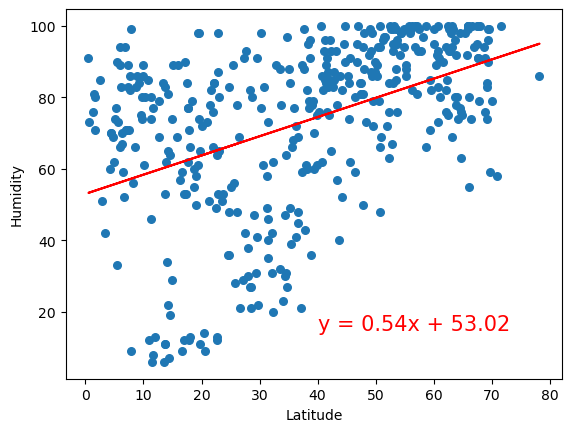

In [39]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Humidity"],
         "Humidity",
         40,
         15
        )

The r-value is: 0.0012350152505874905


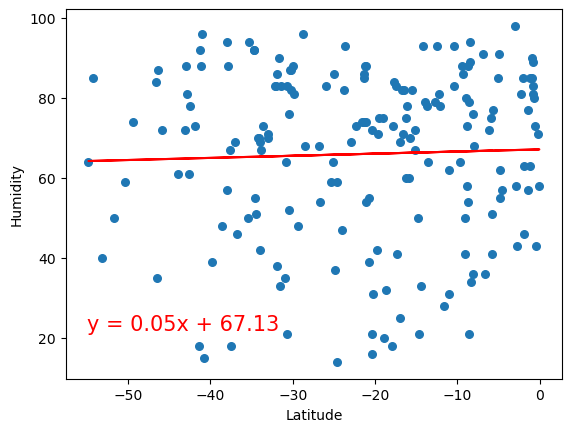

In [40]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Humidity"],
         "Humidity",
         -55,
         22
        )

**Discussion about the linear relationship:**

Since precipitation of some type (rain / ice / snow) occurs almost everywhere on the planet, the amount of humidity should not correlate to the latitude of the place on Earth. This can be seen by the low r-value for both graphs. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07817541975370644


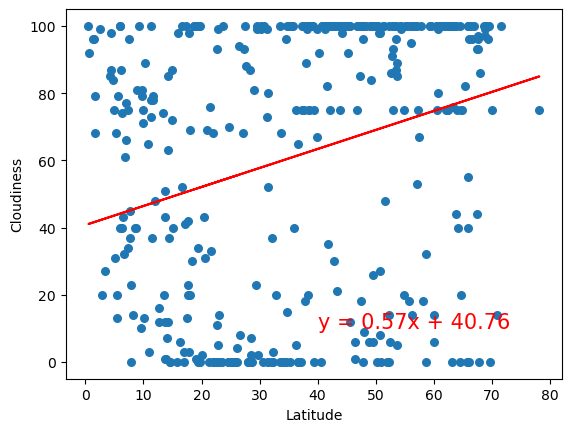

In [41]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Cloudiness"],
         "Cloudiness",
         40,
         10
        )

The r-value is: 0.029573800819095608


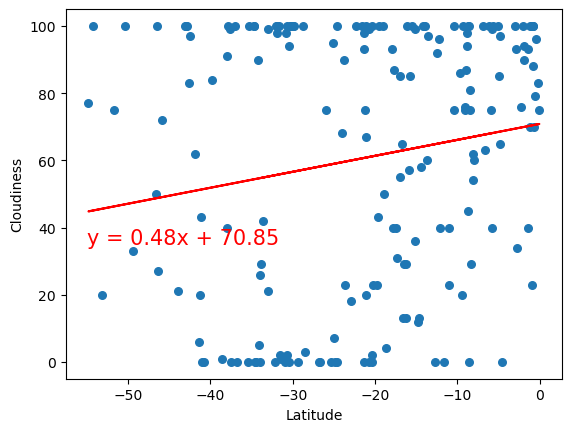

In [42]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Cloudiness"],
         "Cloudiness",
         -55,
         35
        )

**Discussion about the linear relationship:**

Because clouds move with the wind and are created anywhere, the amount of cloudiness won't be related to the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0014522023246755751


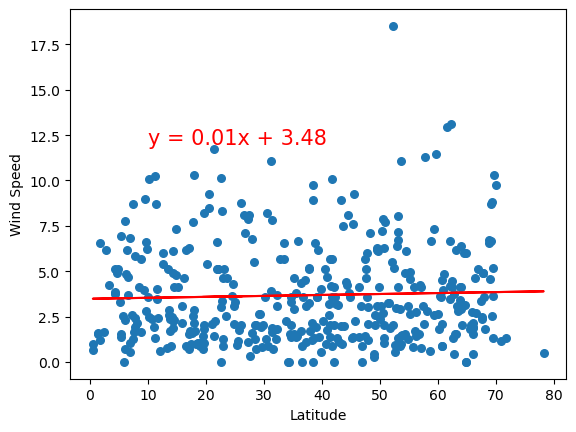

In [43]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Wind Speed"],
         "Wind Speed",
         10,
         12
        )

The r-value is: 0.020706545654445716


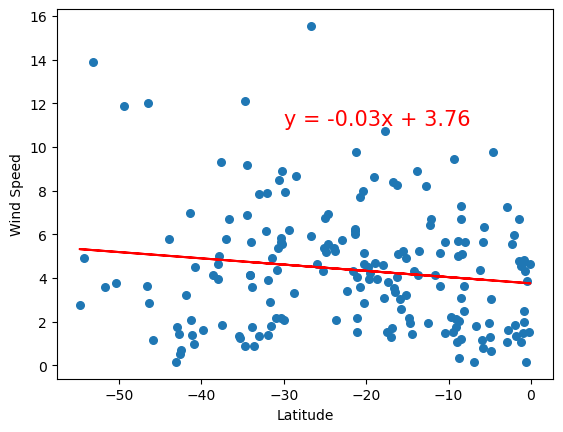

In [44]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Wind Speed"],
         "Wind Speed",
         -30,
         11
        )

**Discussion about the linear relationship:**

The wind speed can vary at a location, depending on multiple factors, such as weather, cloud cover, temperature, etc. This means that it's not tied directly to the latitude of a location, which is verified by the very small r-values in both hemispheres.